### Activate the auto-reload

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import the libraries

In [20]:
import sys
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### Set file path to parent directory

In [21]:
sys.path.append(str(Path().resolve().parent / "src"))
os.chdir("../")

### Import the homemade functions

In [22]:
from src.data.data_import import DataImporter

### Get the API keys to access UN data

How-to available at this address: [https://uncomtrade.org/docs/api-subscription-keys/](https://uncomtrade.org/docs/api-subscription-keys/)

In [ ]:
UN_API_KEY = ""

# Import the data

In [24]:
importer = DataImporter(api_key=UN_API_KEY)
df = importer.get_merged_data()
df.head(2)

Reading merged data from: /Users/nakamurahanako/Documents/GitHub/graspp-25S-trade/data/interim/merge.csv


,,Export,Import,ILO
country,year,,,
ABW,2010,124523218.0,1.071034e+09,6.738
AFG,2014,570534007.0,7.697178e+09,1389.950


## Time Series Analysis of Trade and Employment of the US

In [36]:
# Extract data for the United States (USA) 
usa_df = df.loc['USA']

# Display the first few rows of the USA data to examine the data 
print(usa_df.head())
usa_df = df.loc['USA']
print(usa_df.head())

            Export        Import        ILO
year                                       
2003  7.247366e+11  1.302834e+12  30560.423
2004  8.148444e+11  1.525304e+12  30825.738
2005  9.010414e+11  1.734849e+12  31195.043
2006  1.037029e+12  1.918997e+12  31921.004
2007  1.162538e+12  2.017121e+12  31963.932
            Export        Import        ILO
year                                       
2003  7.247366e+11  1.302834e+12  30560.423
2004  8.148444e+11  1.525304e+12  30825.738
2005  9.010414e+11  1.734849e+12  31195.043
2006  1.037029e+12  1.918997e+12  31921.004
2007  1.162538e+12  2.017121e+12  31963.932


In [40]:
# Create a copy of the USA data to avoid modifying the original
usa_df = df.loc['USA'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
usa_df = usa_df.reset_index()

### Export and Employment

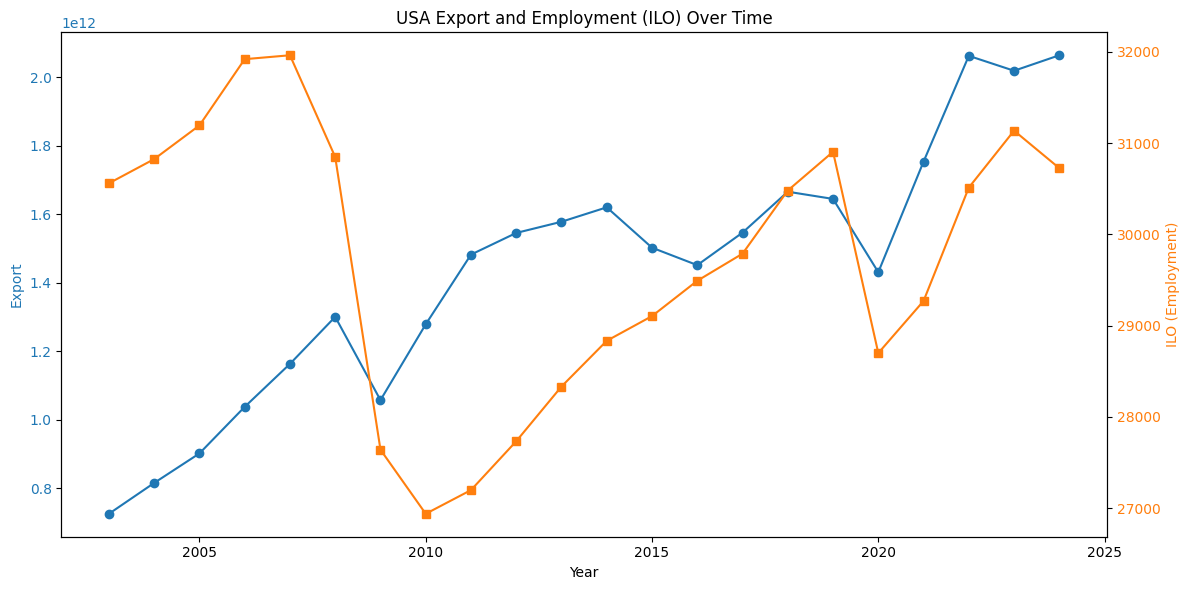

In [41]:
import matplotlib.pyplot as plt

# Create the figure and the first axis (for Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis: Export
ax1.plot(usa_df['year'], usa_df['Export'], color='tab:blue', marker='o', label='Export')
ax1.set_xlabel('Year')
ax1.set_ylabel('Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right Y-aix: Employment
ax2 = ax1.twinx()
ax2.plot(usa_df['year'], usa_df['ILO'], color='tab:orange', marker='s', label='Employment')
ax2.set_ylabel('ILO (Employment)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set the graph title and layout
plt.title('USA Export and Employment (ILO) Over Time')
fig.tight_layout()
plt.show()

### Import and Employment

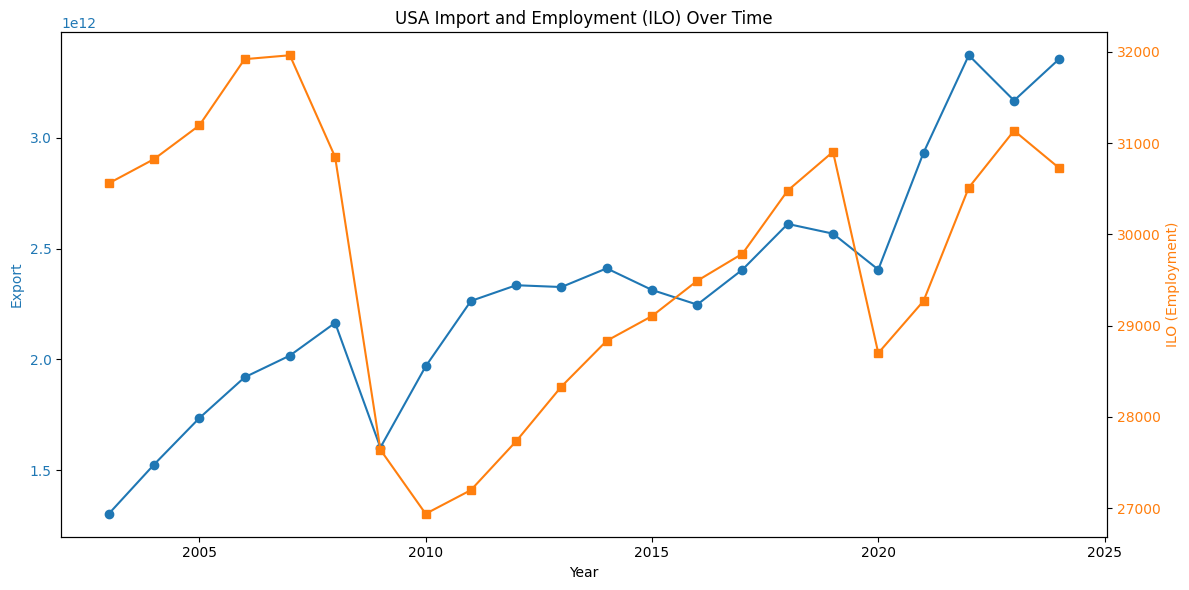

In [42]:
import matplotlib.pyplot as plt

# Create the figure and the first axis (for Import)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis：Import
ax1.plot(usa_df['year'], usa_df['Import'], color='tab:blue', marker='o', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right Y-axis：Employment
ax2 = ax1.twinx()
ax2.plot(usa_df['year'], usa_df['ILO'], color='tab:orange', marker='s', label='Employment')
ax2.set_ylabel('ILO (Employment)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set the graph title and layout
plt.title('USA Import and Employment (ILO) Over Time')
fig.tight_layout()
plt.show()

## Time series analysis of Trade and Employment of Japan

In [45]:
# Extract data for the Japan (JPN) 
jpn_df = df.loc['JPN']

# Display the first few rows of the USA data to examine the data 
print(jpn_df.head())
jpn_df = df.loc['JPN']
print(jpn_df.head())

            Export        Import        ILO
year                                       
2000  4.792755e+11  3.797084e+11  19925.225
2001  4.033441e+11  3.492919e+11  19362.772
2002  4.167294e+11  3.376131e+11  18581.652
2003  4.720069e+11  3.834653e+11  18558.721
2004  5.657611e+11  4.552539e+11  18039.636
            Export        Import        ILO
year                                       
2000  4.792755e+11  3.797084e+11  19925.225
2001  4.033441e+11  3.492919e+11  19362.772
2002  4.167294e+11  3.376131e+11  18581.652
2003  4.720069e+11  3.834653e+11  18558.721
2004  5.657611e+11  4.552539e+11  18039.636


In [46]:
# Create a copy of the JPN data to avoid modifying the original
jpn_df = df.loc['JPN'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
jpn_df = jpn_df.reset_index()

### Export and Employment

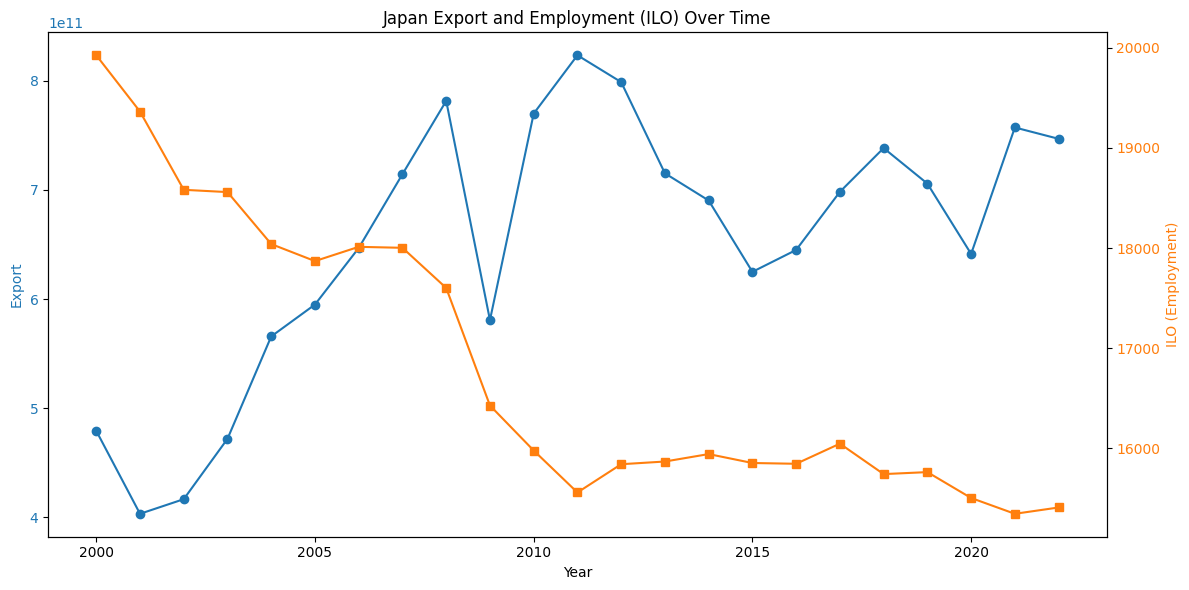

In [47]:
import matplotlib.pyplot as plt

# Create the figure and the first axis (for Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis: Export
ax1.plot(jpn_df['year'], jpn_df['Export'], color='tab:blue', marker='o', label='Export')
ax1.set_xlabel('Year')
ax1.set_ylabel('Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right Y-aix: Employment
ax2 = ax1.twinx()
ax2.plot(jpn_df['year'], jpn_df['ILO'], color='tab:orange', marker='s', label='Employment')
ax2.set_ylabel('ILO (Employment)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set the graph title and layout
plt.title('Japan Export and Employment (ILO) Over Time')
fig.tight_layout()
plt.show()

### Import and Employment

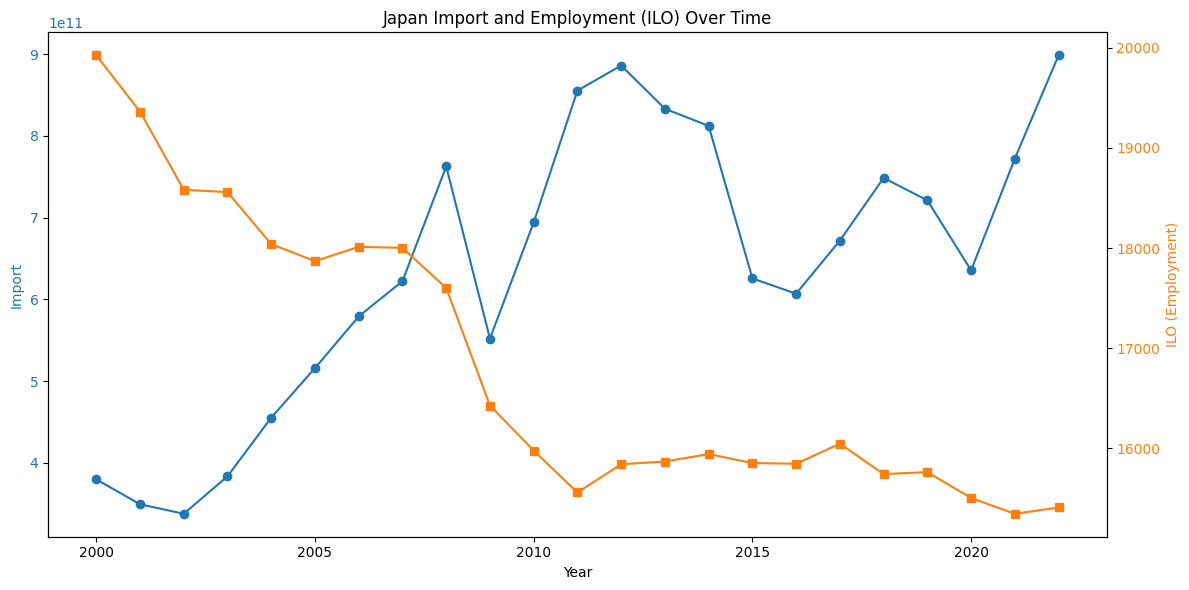

In [48]:
import matplotlib.pyplot as plt

# Create the figure and the first axis (for Import)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis: Import
ax1.plot(jpn_df['year'], jpn_df['Import'], color='tab:blue', marker='o', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Import', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right Y-aix: Employment
ax2 = ax1.twinx()
ax2.plot(jpn_df['year'], jpn_df['ILO'], color='tab:orange', marker='s', label='Employment')
ax2.set_ylabel('ILO (Employment)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set the graph title and layout
plt.title('Japan Import and Employment (ILO) Over Time')
fig.tight_layout()
plt.show()